## Markov Model of Weather - Exercise

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
%matplotlib inline

_Data: https://www.kaggle.com/datasets/ananthr1/weather-prediction_

In [4]:
data = pd.read_csv("seattle-weather.csv")

Possible weather categories:
* drizzle
* rain
* sun
* snow
* fog

In [5]:
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


Data shows daily weather conditions.

In [6]:
data["weather"].str.contains('sun').sum()

640

In [7]:
data["weather"].str.contains('rain').sum()

641

In [8]:
data["weather"].str.contains('fog').sum()

101

In [9]:
data["weather"].str.contains('snow').sum()

26

In [10]:
data["weather"].str.contains('drizzle').sum()

53

In [11]:
weather_list = list(data["weather"].unique())

#sun_to_sun = 
for weather in weather_list:
    permutacija i len count stanja u stanje i to sve Markovljeve stvariiiiiiiiiiiii i matrica, nek bude dinamično ako može, kasnije kada dobijem
    matricu prijelaznih vjerojatnosti provjeriti ergodički teorem i naći stacionarna stanja, možda dijagonalizacijom također, a usporediti

krivo normiranje vjerojatnosti na prošlom Markov projektu


In [36]:
#i - rows of transition matrix
#j - columns of transition matrix
transition_matrix = np.zeros(shape=(len(weather_list), len(weather_list)),dtype=np.float32)#object
for i in range (len(weather_list)):
    for j in range(len(weather_list)):
        numerator = len(data[(data["weather"]==weather_list[j]) & (data["weather"].shift(-1)==weather_list[i])])
        denominator = len(data[data["weather"]==weather_list[i]])
        p_ij = numerator / denominator
        transition_matrix[i,j] = p_ij
        #transition_matrix[i,j] = weather_list[i]+weather_list[j]


In [95]:
transition_matrix

array([[0.3018868 , 0.33962265, 0.3018868 , 0.01886792, 0.01886792],
       [0.02964118, 0.673947  , 0.23088923, 0.01560062, 0.049922  ],
       [0.0234375 , 0.225     , 0.68125   , 0.0078125 , 0.0625    ],
       [0.        , 0.42307693, 0.1923077 , 0.3846154 , 0.        ],
       [0.02970297, 0.35643566, 0.33663365, 0.        , 0.27722773]],
      dtype=float32)

In [81]:
#Norm check
np.sum(transition_matrix,axis=1).tolist()

[0.9811320304870605, 1.0000001192092896, 1.0, 1.0, 1.0]

In [82]:
transition_data=pd.DataFrame(transition_matrix, columns=weather_list)
transition_data.index = weather_list; transition_data

,drizzle,rain,sun,snow,fog
drizzle,0.301887,0.339623,0.301887,0.018868,0.018868
rain,0.029641,0.673947,0.230889,0.015601,0.049922
sun,0.023438,0.225000,0.681250,0.007812,0.062500
snow,0.000000,0.423077,0.192308,0.384615,0.000000
fog,0.029703,0.356436,0.336634,0.000000,0.277228


Assume an initial state vector as defined by $\vec{v_0} = (0,1,0,0,0)$ (i.e it was _raining_ at Markov step 0). The probability of a particular weather at Markov step 1 (i.e the day after) is calculated as $\vec{v_1}  = P\vec{v_1} $ (where $P$ is the transition matrix) and results in the state vector:

In [118]:
v_0_row = np.array([0,1,0,0,0])
np.matmul(v_0_row, transition_matrix)

array([0.02964118, 0.67394698, 0.23088923, 0.01560062, 0.049922  ])

...giving the probabilites for "_drizzle_", "_rain_", "_sun_", "_snow_", "_fog_" at step 1, respectively.

The state vector at step N (e.g. N=20) is calculated as: $\vec{v_N} = P^N\vec{v_0}$. For N=20 we have:

In [122]:
v_0_row = np.array([0,1,0,0,0])
N=20
transition_matrix_N = np.linalg.matrix_power(transition_matrix, N)
np.matmul(v_0_row, transition_matrix_N)

array([0.03584966, 0.43368059, 0.43175784, 0.0175943 , 0.0682902 ])

...giving the probabilites for the aformentioned weather conditions. Notice that in our dataset one step interval equals to one calendar day.

If the elements of $P^N$ converge to values $\pi_ij$ that are larger than 0 *and* all elements of $P^N$ are larger than 0 (i.e. the transition from any state to any another state is possible), then $\pi_ij$ are said to be stationary states. Numerically, we can check the convergence of the transition probabilities by computing the powers of the transition matrix and plotting their convergence over the number of steps N. We will do so on one particular element of the transition matrix, $P_{22}$.

In [127]:
transition_matrix[2,2]

0.68125

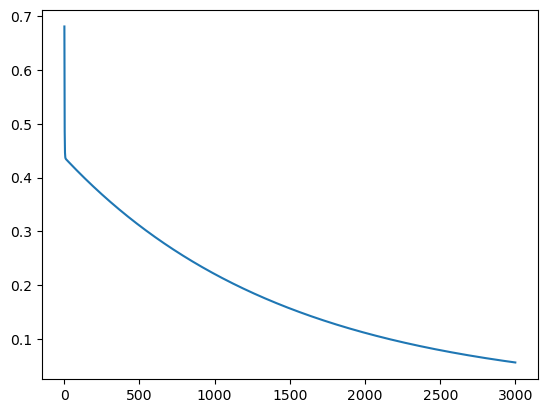

In [125]:
convergence_list = []
for n in range(1,3000):
    p_n = np.linalg.matrix_power(transition_matrix, n)
    convergence_list.append(p_n[2,2])
plt.plot([n for n in range(1,3000)],convergence_list)

The transition probabilty $p_{22}$ does not converge to a stationary value $\pi_{22} > 0$, therefore the ergodic theorem does not apply. Instead, it approaches zero for large N.

                                                                    ~ Gregoritsch3